In [14]:
# Print Python and Conda versions
!python --version

Python 3.10.9


In [15]:
# Local path to data
DATA_DIR = '/projects/bachelor-thesis/data'
!ls $DATA_DIR

raw_data_32TNS_1C  raw_data_32TNS_2A


In [3]:
# Define and clear temp working directory
TMP_DIR = '/projects/bachelor-thesis/tmp'
!mkdir -p $TMP_DIR
!rm -rf $TMP_DIR / *

In [4]:
DATE = "20210710T101559"

# List corresponding files
!ls $DATA_DIR / raw_data_32TNS_1C | grep $DATE
!ls $DATA_DIR / raw_data_32TNS_2A | grep $DATE

!unzip $DATA_DIR / raw_data_32TNS_1C / $(ls $DATA_DIR / raw_data_32TNS_1C | grep $DATE) -d $TMP_DIR
!unzip $DATA_DIR / raw_data_32TNS_2A / $(ls $DATA_DIR / raw_data_32TNS_2A | grep $DATE) -d $TMP_DIR


S2B_MSIL1C_20210710T101559_N0301_R065_T32TNS_20210710T122740.zip
S2B_MSIL2A_20210710T101559_N0301_R065_T32TNS_20210710T132321.zip
Archive:  /projects/bachelor-thesis/data/raw_data_32TNS_1C/S2B_MSIL1C_20210710T101559_N0301_R065_T32TNS_20210710T122740.zip
 extracting: /projects/bachelor-thesis/tmp/S2B_MSIL1C_20210710T101559_N0301_R065_T32TNS_20210710T122740.SAFE/MTD_MSIL1C.xml  
 extracting: /projects/bachelor-thesis/tmp/S2B_MSIL1C_20210710T101559_N0301_R065_T32TNS_20210710T122740.SAFE/INSPIRE.xml  
 extracting: /projects/bachelor-thesis/tmp/S2B_MSIL1C_20210710T101559_N0301_R065_T32TNS_20210710T122740.SAFE/manifest.safe  
   creating: /projects/bachelor-thesis/tmp/S2B_MSIL1C_20210710T101559_N0301_R065_T32TNS_20210710T122740.SAFE/AUX_DATA/
 extracting: /projects/bachelor-thesis/tmp/S2B_MSIL1C_20210710T101559_N0301_R065_T32TNS_20210710T122740.SAFE/GRANULE/L1C_T32TNS_A022685_20210710T102312/MTD_TL.xml  
 extracting: /projects/bachelor-thesis/tmp/S2B_MSIL1C_20210710T101559_N0301_R065_T32TNS_

In [5]:
BASE_PATH = f"{TMP_DIR}/S2B_MSIL1C_20210710T101559_N0301_R065_T32TNS_20210710T122740.SAFE/GRANULE/L1C_T32TNS_A022685_20210710T102312/IMG_DATA"

B01 = "T32TNS_20210710T101559_B01.jp2"
B02 = "T32TNS_20210710T101559_B02.jp2"
B03 = "T32TNS_20210710T101559_B03.jp2"
B04 = "T32TNS_20210710T101559_B04.jp2"
B05 = "T32TNS_20210710T101559_B05.jp2"
B06 = "T32TNS_20210710T101559_B06.jp2"
B07 = "T32TNS_20210710T101559_B07.jp2"
B08 = "T32TNS_20210710T101559_B08.jp2"
B8A = "T32TNS_20210710T101559_B8A.jp2"
B09 = "T32TNS_20210710T101559_B09.jp2"
B10 = "T32TNS_20210710T101559_B10.jp2"
B11 = "T32TNS_20210710T101559_B11.jp2"
B12 = "T32TNS_20210710T101559_B12.jp2"
TCI = "T32TNS_20210710T101559_TCI.jp2"

In [6]:
import rasterio
from rasterio.plot import show

# Open the RGB image using rasterio
img = rasterio.open(f"{BASE_PATH}/{TCI}")
print("Number of bands = ", img.count)

Number of bands =  3


In [7]:
# Coordinate Reference System, which is the normal EPSG:32632 WGS 84 / UTM zone 32N
img.crs

CRS.from_epsg(32632)

In [8]:
# Some basic metadata
img.meta

{'driver': 'JP2OpenJPEG',
 'dtype': 'uint8',
 'nodata': None,
 'width': 10980,
 'height': 10980,
 'count': 3,
 'crs': CRS.from_epsg(32632),
 'transform': Affine(10.0, 0.0, 499980.0,
        0.0, -10.0, 5200020.0)}

In [9]:
# Geotransform
img.transform

Affine(10.0, 0.0, 499980.0,
       0.0, -10.0, 5200020.0)

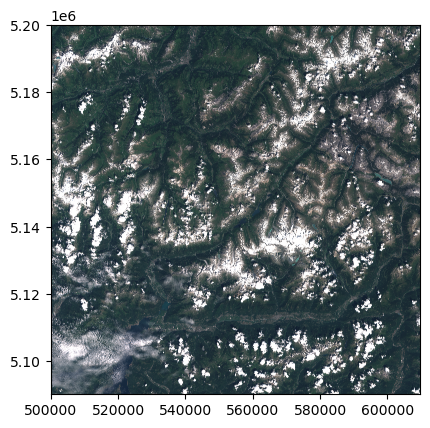

<AxesSubplot: >

In [16]:
# Plot the RGB image
show(img)

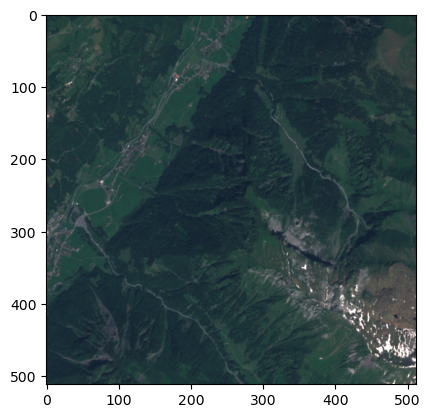

<AxesSubplot: >

In [22]:
from rasterio.windows import Window

# Plot the top left corner of the image (512x512 pixels)
show(img.read(window=Window(0, 0, 512, 512)))

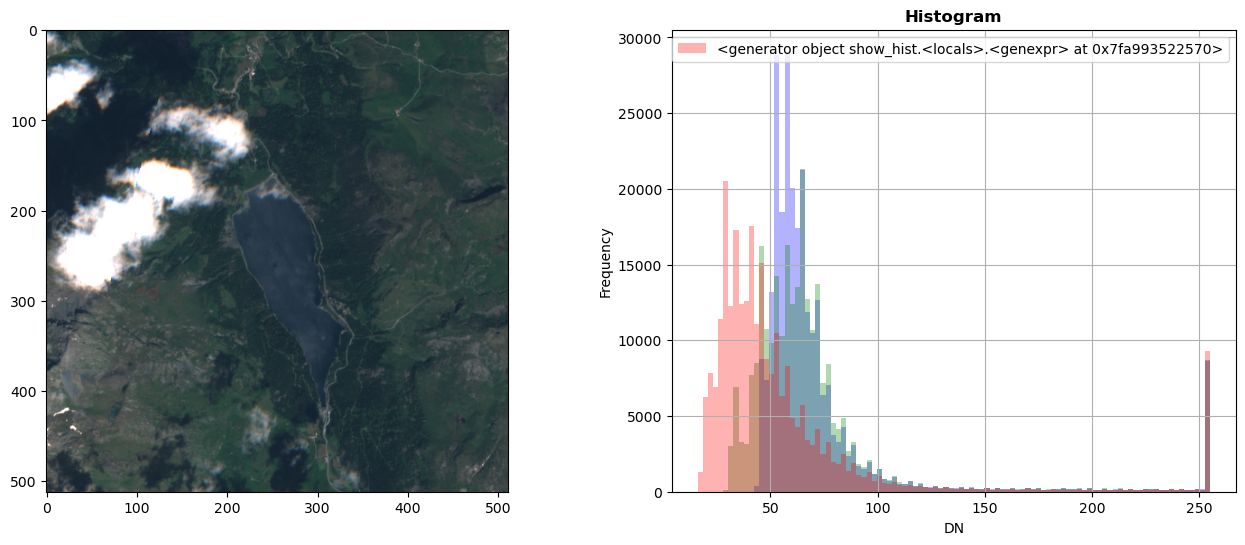

In [60]:
from matplotlib import pyplot as plt
import rasterio

(lon, lat) = (548696.7,5150003.9)
IMG_SIZE = 512

py, px = img.index(lon, lat)
window = Window(px - IMG_SIZE // 2, py - IMG_SIZE // 2, IMG_SIZE, IMG_SIZE)

# Plot the window aside with the histogram
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
show(img.read(window=window), ax=ax[0])
rasterio.plot.show_hist(img.read(window=window), bins=100, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', ax=ax[1], title="Histogram")

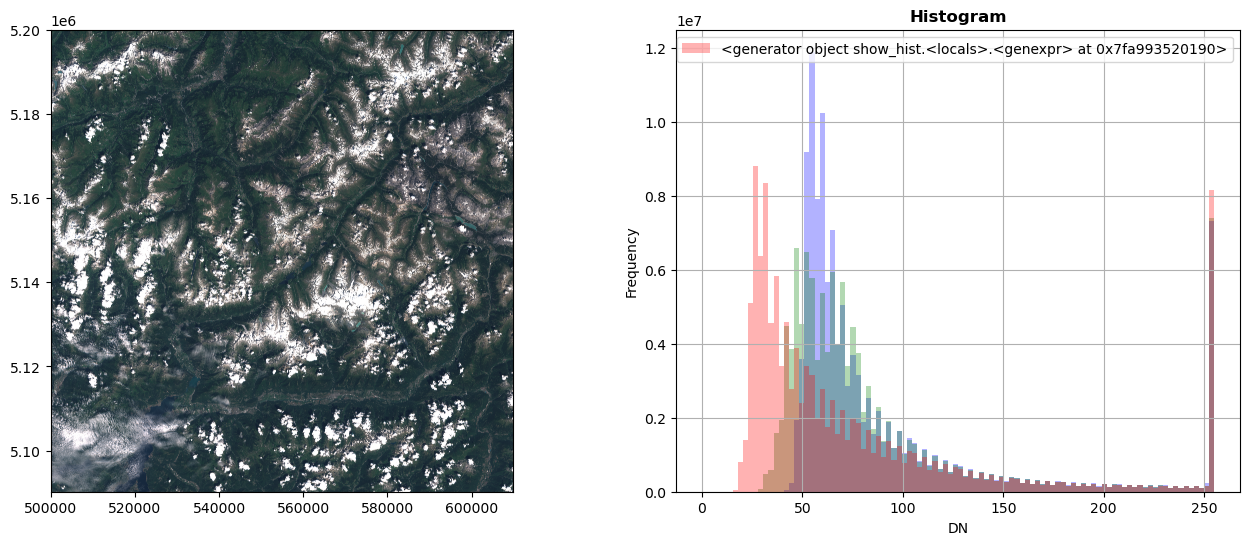

In [61]:
# Plot the window aside with the histogram
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
show(img, ax=ax[0])
rasterio.plot.show_hist(img, bins=100, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', ax=ax[1], title="Histogram")